# **Análisis de sentimientos en Twitter**

In [1]:
import tweepy
import numpy as np      
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sn 
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Twitter App access keys 
# Consume:
CONSUMER_KEY    = 'a9bzKMXFucNuiRajf4wLGXBdb'
CONSUMER_SECRET = 'bCSZMQrhFfDsW1mJRf0VhKNxyO5jk7taEn5D5IQFB5idVz19rR'

#'AAAAAAAAAAAAAAAAAAAAAHw2ngEAAAAA7ov74ujVtY3iykY%2Fe68tRwNkvTg%3DxacINuSrgFwZIDKj5zpPS0oha1TdEK14MPIAJ5zsozZlpRTONz'
ACCESS_SECRET  = 'DPHGsyZPxoMYGdR4oDGwrTcuIMDkIUIjtvVDWaoYxFe2b'
ACCESS_TOKEN = '1658685837679239168-bLNRwCuOsZXA8bn6rKMSRg2Gu2lMdF'

In [30]:
def twitter_setup():
    """
    Function to setup the Twitter's API.
    """
    # Authentication and access using keys
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication
    api = tweepy.API(auth)
    return api

In [6]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="Samnsung", count=200)
# print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
# print("5 recent tweets:\n")
# for tweet in tweets[:5]:
#     print(tweet.text)
#     print()

Forbidden: 403 Forbidden
453 - You currently have access to Twitter API v2 endpoints and limited v1.1 endpoints only. If you need access to this endpoint, you may need a different access level. You can learn more here: https://developer.twitter.com/en/docs/twitter-api/getting-started/about-twitter-api#v2-access-leve

In [2]:
#Load Data Base
tweets = pd.read_csv(r"C:\Users\eric-\Downloads\rawdata.csv")
tweets.head(5)

,Tweets,Retweets,Likes,Date
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00
3,@BillyM2k 👻,802,19353,2022-10-27 02:32:48
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32


**Clean data** 

In [4]:
tweets['Date']=tweets.Date.str.slice(0,10)

In [3]:
import re
def clean_text(text):
    #first include all possible emoji in a variable
    emoji=re.compile("["
                     u"\U0001F600-\U0001F64F"    #emoticons
                     u"\U0001F300-\U0001F5FF"    #symbol & pictographs
                     u"\U0001F680-\U0001F6FF"    #transport & map
                     u"\U0001F1E0-\U0001F1FF"    #flags
                     u"\U00002500-\U00002BEF"    #chinese char
                     u"\U00002702-\U000027B0"
                     u"\U000024C2-\U0001F251"
                     u"\U0001f926-\U0001f937"
                     u"\U00010000-\U0010ffff"
                     u"\u2640-\u2642" 
                     u"\u2600-\u2B55"
                     u"\u200d"
                     u"\u23cf"
                     u"\u23e9"
                     u"\u231a"
                     u"\ufe0f"    
                     u"\u3030"
                              "]+", re.UNICODE)
    text=re.sub('RT','',text)                       #remove 'RT' 
    text=re.sub('#[A-Za-z0-9]+','',text)            #remove #
    text=re.sub('\\n','',text)                      #remove \n from 
    text=re.sub('https?://\S+|www\.\S+','',text)    #remove the hyperlinks 
    text=re.sub('@[\S]*','',text)                   #remove the mentions 
    text=re.sub('[^\w\s]','',text)                  #remove punctuation 
    text=re.sub('^[\s]+|[\s]+$','',text)            #remove leading & trailing whitespace 
    text=re.sub(emoji,'',text)                      #remove the emojis 
    text=text.lower()
    
    return text

In [5]:
tweets['CleanedTweets']=tweets['Tweets'].apply(clean_text)
tweets.head(10)

,Tweets,Retweets,Likes,Date,CleanedTweets
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27,thanks
1,@ZubyMusic Absolutely,755,26737,2022-10-27,absolutely
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27,dear twitter advertisers
3,@BillyM2k 👻,802,19353,2022-10-27,
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26,meeting a lot of cool people at twitter today
5,Entering Twitter HQ – let that sink in! https:...,145520,1043592,2022-10-26,entering twitter hq let that sink in
6,@dogeofficialceo @mtaibbi 🤣💪,194,3611,2022-10-26,
7,@mtaibbi 🤣,117,2848,2022-10-26,
8,@ARodTV Definitely closer to citizen journalis...,699,10189,2022-10-26,definitely closer to citizen journalism local...
9,@sandyleevincent Nobody bats 1000 🤷‍♂️,126,2920,2022-10-26,nobody bats 1000


In [13]:
tweets.drop(tweets[tweets['CleanedTweets']==''].index, inplace=True)

In [15]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2637 entries, 0 to 3059
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweets         2637 non-null   object
 1   Retweets       2637 non-null   int64 
 2   Likes          2637 non-null   int64 
 3   Date           2637 non-null   object
 4   CleanedTweets  2637 non-null   object
dtypes: int64(2), object(3)
memory usage: 123.6+ KB


Sentiment Analysis of the tweets


In [34]:
import nltk
from textblob import TextBlob

In [8]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#function to label the sentiment 
def getSentiment(value):
    if value<0:
        return 'Negative'
    elif value>0:
        return 'Positive'
    else:
        return 'Neutral'

In [9]:
tweets['Polarity']=tweets['CleanedTweets'].apply(getPolarity)
tweets['Subjectivity']=tweets['CleanedTweets'].apply(getSubjectivity)
tweets['Sentiment']=tweets['Polarity'].apply(getSentiment)
tweets['Date']=tweets.Date.str.slice(0,10)
tweets['Month']=pd.DatetimeIndex(tweets['Date']).month
tweets.head()

,Tweets,Retweets,Likes,Date,CleanedTweets,Polarity,Subjectivity,Sentiment,Month
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27,thanks,0.20,0.20,Positive,10
1,@ZubyMusic Absolutely,755,26737,2022-10-27,absolutely,0.20,0.90,Positive,10
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27,dear twitter advertisers,0.00,0.00,Neutral,10
3,@BillyM2k 👻,802,19353,2022-10-27,,0.00,0.00,Neutral,10
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26,meeting a lot of cool people at twitter today,0.35,0.65,Positive,10


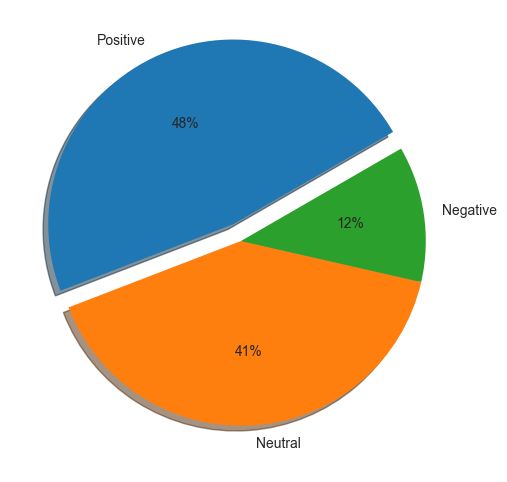

In [29]:
plt.figure(figsize=(6,6))
values=tweets['Sentiment'].value_counts()
label=['Positive','Neutral','Negative']
explode=[0.1,0,0]
plt.pie(values,labels=label,explode=explode,autopct='%.0f%%',shadow=True,startangle=30)
plt.show()

In [22]:
def Analysys(tweets,sent):
    positive=[]
    neutral=[]
    negative=[]
    for i in tweets['Month'].unique():
        pos=tweets.loc[(tweets['Month']==i) & (tweets['Sentiment']=='Positive'),sent].sum()
        positive.append(pos)
        
        neu=tweets.loc[(tweets['Month']==i) & (tweets['Sentiment']=='Neutral'),sent].sum()
        neutral.append(neu)
        
        neg=tweets.loc[(tweets['Month']==i) & (tweets['Sentiment']=='Negative'),sent].sum()
        negative.append(neg)

    date=tweets['Month'].unique().tolist()
    month=['Oct','Sep','Aug','Jul','Jun','May','Apr','Mar','Feb','Jan']

    plt.style.use('seaborn-darkgrid')
    plt.figure(figsize=(8,6))

    plt.plot(date,neutral,marker='o',color='black',linewidth=1, alpha=0.4)
    plt.plot(date,negative,marker='o',color='grey',linewidth=1, alpha=0.4)
    plt.plot(date,positive,marker='o',color='orange',linewidth=4, alpha=0.7)

    plt.xlim(0,11.5)

    plt.text(10.2,neutral[0],'Neutral',horizontalalignment='left',color='black',fontsize='large',fontstyle='italic',fontweight='regular')
    plt.text(10.2,negative[0],'Negative',horizontalalignment='left',color='grey',fontsize='large',fontstyle='italic',fontweight='regular')
    plt.text(10.2,positive[0],'Positive',horizontalalignment='left',color='orange',fontsize='large',fontstyle='italic',fontweight='semibold')

    plt.xticks(date,labels=month,color='black',fontsize='medium',fontweight='medium')
    plt.yticks(color='black',fontsize='medium',fontweight='medium')

    plt.title(f"Total {sent} by Tweets Sentiment (Jan'22 to Oct'22)",loc='center',color='grey',fontsize=15,fontweight='semibold')
    plt.ylabel(f"Count of Total {sent}",color='grey',fontsize=10,fontweight='semibold')
    #plt.savefig('likes by sentiment.png')
    plt.show()

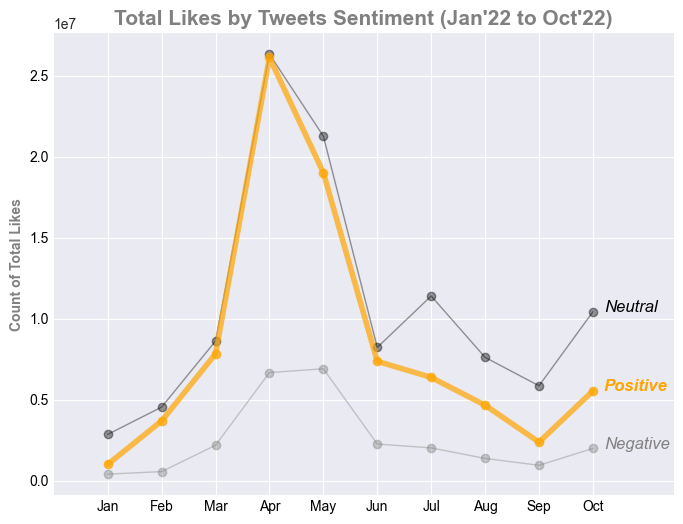

In [23]:
Analysys(tweets,'Likes')

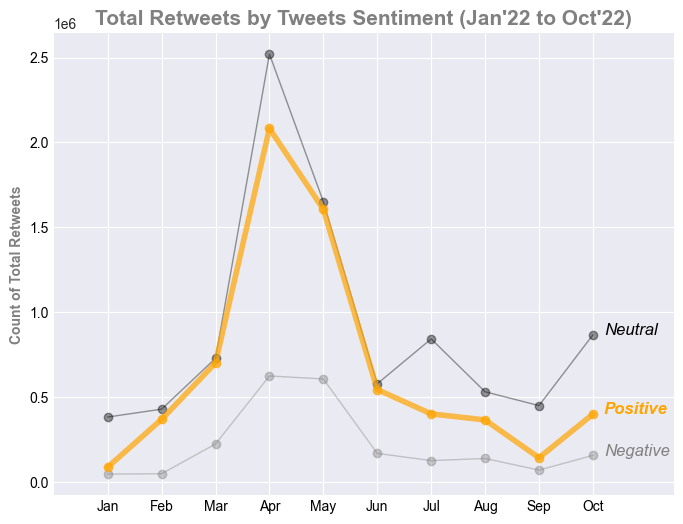

In [24]:
Analysys(tweets,'Retweets')

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [32]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(tweets['CleanedTweets'])

X_train, X_test, Y_train, Y_test = train_test_split(text_counts, tweets['Sentiment'], test_size=0.25, random_state=7)

In [35]:
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print("Accuracuy Score:",accuracy_score*100)

Accuracuy Score: 73.72549019607844
